# Central Hidroeléctrica Yacyretá
## 07 - Reducción y regresión por algoritmos de aprendizaje automático  
### Fecha: 12-Enero-22

In [73]:
# Para que funcione más rápidamente el intellisense
#%config Completer.use_jedi = False

In [74]:
#Cargo numpy y pandas para trabajar con dataframes
import pandas as pd
import numpy as np
from datetime import date


import matplotlib.pyplot as plt
#rcParams["figure.figsize"] = 16, 4

In [75]:
# Imports necesarios para que funcione iplot() como método de pandas
%matplotlib inline
import plotly.graph_objs as go
from  plotly.offline import plot
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected='true')

In [76]:
from tabulate import tabulate

In [77]:
# Especifico el nombre del archivo con el dataset unificado de la CHY y el path
path = './datasets/CHY/output/'
file_name = 'CHY_dataset.csv'

In [78]:
# Leo el dataset creado en el notebook anterior
df = pd.read_csv(path + file_name)

In [79]:
# veo cabeza y cola del df
df

,FECHA,COTA_EMBALSE,COTA_RESTITUCION,SALTO,QAFLR,QVBP,QVBAC,QTURB,SINP,SADI
0,2011-01-01,82.04,60.17,21.87,13936.0,0.0,1045.0,11977.0,5391.00,49384.000
1,2011-01-02,82.06,60.17,21.89,13267.0,0.0,1045.0,11863.0,5631.60,48785.000
2,2011-01-03,82.07,60.12,21.95,12670.0,0.0,1045.0,11439.0,6871.60,46573.000
3,2011-01-04,82.08,60.12,21.96,12909.0,0.0,1045.0,11505.0,7460.80,46046.000
4,2011-01-05,82.13,60.08,22.05,13787.0,0.0,1047.0,11455.0,6555.00,46721.000
...,...,...,...,...,...,...,...,...,...,...
3828,2021-06-26,82.78,58.94,23.84,6545.0,0.0,1017.0,5157.0,4388.60,21594.112
3829,2021-06-27,82.78,58.94,23.84,6337.0,0.0,1017.0,5135.0,4188.42,21658.536
3830,2021-06-28,82.79,58.93,23.86,6138.0,0.0,1017.0,5121.0,5165.92,20606.040
3831,2021-06-29,82.79,58.93,23.86,6133.0,0.0,1017.0,5116.0,5427.90,20416.960


In [80]:
# Veo el tipo de dato de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FECHA             3833 non-null   object 
 1   COTA_EMBALSE      3833 non-null   float64
 2   COTA_RESTITUCION  3833 non-null   float64
 3   SALTO             3833 non-null   float64
 4   QAFLR             3833 non-null   float64
 5   QVBP              3833 non-null   float64
 6   QVBAC             3833 non-null   float64
 7   QTURB             3833 non-null   float64
 8   SINP              3833 non-null   float64
 9   SADI              3833 non-null   float64
dtypes: float64(9), object(1)
memory usage: 299.6+ KB


In [81]:
# Convierto la columna FECHA de object a datetime64
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [82]:
# Veo el tipo de dato de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             3833 non-null   datetime64[ns]
 1   COTA_EMBALSE      3833 non-null   float64       
 2   COTA_RESTITUCION  3833 non-null   float64       
 3   SALTO             3833 non-null   float64       
 4   QAFLR             3833 non-null   float64       
 5   QVBP              3833 non-null   float64       
 6   QVBAC             3833 non-null   float64       
 7   QTURB             3833 non-null   float64       
 8   SINP              3833 non-null   float64       
 9   SADI              3833 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 299.6 KB


In [83]:
# Hago que la columna FECHA sea el índice
df.set_index('FECHA', inplace=True)

In [84]:
df

,COTA_EMBALSE,COTA_RESTITUCION,SALTO,QAFLR,QVBP,QVBAC,QTURB,SINP,SADI
FECHA,,,,,,,,,
2011-01-01,82.04,60.17,21.87,13936.0,0.0,1045.0,11977.0,5391.00,49384.000
2011-01-02,82.06,60.17,21.89,13267.0,0.0,1045.0,11863.0,5631.60,48785.000
2011-01-03,82.07,60.12,21.95,12670.0,0.0,1045.0,11439.0,6871.60,46573.000
2011-01-04,82.08,60.12,21.96,12909.0,0.0,1045.0,11505.0,7460.80,46046.000
2011-01-05,82.13,60.08,22.05,13787.0,0.0,1047.0,11455.0,6555.00,46721.000
...,...,...,...,...,...,...,...,...,...
2021-06-26,82.78,58.94,23.84,6545.0,0.0,1017.0,5157.0,4388.60,21594.112
2021-06-27,82.78,58.94,23.84,6337.0,0.0,1017.0,5135.0,4188.42,21658.536
2021-06-28,82.79,58.93,23.86,6138.0,0.0,1017.0,5121.0,5165.92,20606.040


In [85]:
#print(df.to_markdown(index=False))
print(tabulate(df.iloc[:10,0:5], headers='keys', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════╤════════════════════╤═════════╤═════════╤════════╕
│ FECHA               │   COTA_EMBALSE │   COTA_RESTITUCION │   SALTO │   QAFLR │   QVBP │
╞═════════════════════╪════════════════╪════════════════════╪═════════╪═════════╪════════╡
│ 2011-01-01 00:00:00 │          82.04 │              60.17 │   21.87 │   13936 │      0 │
├─────────────────────┼────────────────┼────────────────────┼─────────┼─────────┼────────┤
│ 2011-01-02 00:00:00 │          82.06 │              60.17 │   21.89 │   13267 │      0 │
├─────────────────────┼────────────────┼────────────────────┼─────────┼─────────┼────────┤
│ 2011-01-03 00:00:00 │          82.07 │              60.12 │   21.95 │   12670 │      0 │
├─────────────────────┼────────────────┼────────────────────┼─────────┼─────────┼────────┤
│ 2011-01-04 00:00:00 │          82.08 │              60.12 │   21.96 │   12909 │      0 │
├─────────────────────┼────────────────┼────────────────────┼─────────┼─────────┼────────┤

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3833 entries, 2011-01-01 to 2021-06-30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COTA_EMBALSE      3833 non-null   float64
 1   COTA_RESTITUCION  3833 non-null   float64
 2   SALTO             3833 non-null   float64
 3   QAFLR             3833 non-null   float64
 4   QVBP              3833 non-null   float64
 5   QVBAC             3833 non-null   float64
 6   QTURB             3833 non-null   float64
 7   SINP              3833 non-null   float64
 8   SADI              3833 non-null   float64
dtypes: float64(9)
memory usage: 299.5 KB


In [87]:
df.index
# Veo que el índice no tiene frecuencia asidnada, aunque se ve claramente que es diaria

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', name='FECHA', length=3833, freq=None)

In [88]:
# Le asigno frecuencia diaria
#df = df.asfreq('D')

# Si fuera necesario imputar NAN
df = df.asfreq('D', method='ffill') 

# Vuelvo a ver el índice
df

,COTA_EMBALSE,COTA_RESTITUCION,SALTO,QAFLR,QVBP,QVBAC,QTURB,SINP,SADI
FECHA,,,,,,,,,
2011-01-01,82.04,60.17,21.87,13936.0,0.0,1045.0,11977.0,5391.00,49384.000
2011-01-02,82.06,60.17,21.89,13267.0,0.0,1045.0,11863.0,5631.60,48785.000
2011-01-03,82.07,60.12,21.95,12670.0,0.0,1045.0,11439.0,6871.60,46573.000
2011-01-04,82.08,60.12,21.96,12909.0,0.0,1045.0,11505.0,7460.80,46046.000
2011-01-05,82.13,60.08,22.05,13787.0,0.0,1047.0,11455.0,6555.00,46721.000
...,...,...,...,...,...,...,...,...,...
2021-06-26,82.78,58.94,23.84,6545.0,0.0,1017.0,5157.0,4388.60,21594.112
2021-06-27,82.78,58.94,23.84,6337.0,0.0,1017.0,5135.0,4188.42,21658.536
2021-06-28,82.79,58.93,23.86,6138.0,0.0,1017.0,5121.0,5165.92,20606.040


In [89]:
SALTO = df['SALTO'].squeeze()

In [90]:
SALTO

FECHA
2011-01-01    21.87
2011-01-02    21.89
2011-01-03    21.95
2011-01-04    21.96
2011-01-05    22.05
              ...  
2021-06-26    23.84
2021-06-27    23.84
2021-06-28    23.86
2021-06-29    23.86
2021-06-30    23.89
Freq: D, Name: SALTO, Length: 3834, dtype: float64

In [91]:
# Plotly Cufflinks layout
layout1 = cf.Layout(
    height=400,
    width=950
)

# Themes: ggplot, pearl, solar, space, white, polar, henanigans

In [92]:
df.iplot(keys=['SALTO'], color='Steelblue', title='SALTO, Gráfico en el tiempo', 
         yTitle='msnm', xTitle='Fecha', dimensions=(950, 350), theme='pearl' )

<AxesSubplot:xlabel='FECHA'>

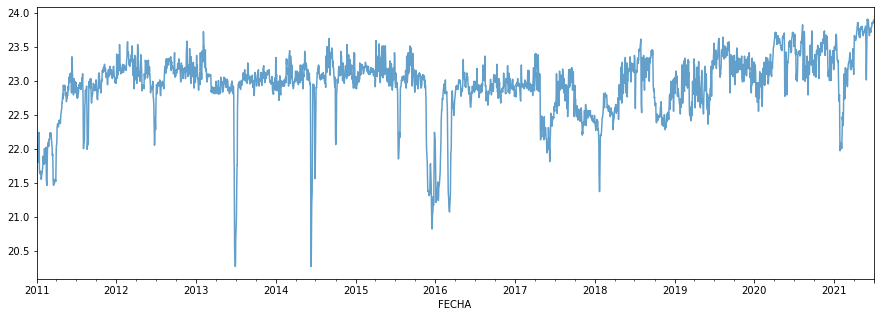

In [93]:
# Ploteo rápido de la variable SALTO
SALTO.plot(figsize=(15,5), alpha=0.7, label=True)

In [94]:
# Imprimo algunas estadísticas de SALTO, en particular la std
SALTO.describe()

count    3834.000000
mean       22.936473
std         0.464080
min        20.270000
25%        22.820000
50%        23.010000
75%        23.190000
max        23.900000
Name: SALTO, dtype: float64

#### Cargo las métricas de evaluación de desempeño

In [95]:
from sktime.performance_metrics.forecasting import MeanAbsoluteError, MeanSquaredError, MeanAbsoluteScaledError

In [96]:
mae = MeanAbsoluteError()
mse = MeanSquaredError()
rmse = MeanSquaredError(square_root=True)
mase = MeanAbsoluteScaledError()

## Reducción

In [97]:
# Número de observaciones del salto
observations = len(SALTO)

In [98]:
# Número de features a generar (Reduction)
features = 60

In [99]:
# Listas de features y de target
X = [] # Matriz de features
y = [] # Vector de targets

In [100]:
# Hago la reducción
for i in range(0, observations-features):
    X.append(SALTO[i:i+features]) # 'features' valores
    y.append(SALTO[i+features])   # Un solo target 

In [101]:
# Convierto las listas en arreglos de Numpay
X = np.array(X)
y = np.array(y)

In [102]:
len(X)

3774

In [103]:
# Train / test split
fh = 7 # Pasos (días) a predecir

# Features splitting
X_train = X[:len(X)-fh]
X_test = X[len(X)-fh:]

# Target splitting
y_train = y[:len(X)-fh]
y_test = y[len(X)-fh:]

In [104]:
# Importo los regresores
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge        

In [105]:
# Lista con los regresores
regresores = [ 
    KNeighborsRegressor()
    ,Lasso()
    ,LGBMRegressor(objective='regression', linear_tree=True)
    ,LinearRegression()
    ,MLPRegressor(max_iter=600, random_state=170162)
    ,RandomForestRegressor(criterion='absolute_error', random_state=170162) 
    ,Ridge()
    ,SVR(gamma='auto', kernel='rbf') 
    ,XGBRegressor()
    ]

In [106]:
# Creo una lista para las métricas
error_metrics=[]

# Itero sobre la lista de regresores
for regresor in regresores:
    
    # Entreno el regresor con los conjuntos de train
    regresor.fit(X_train, y_train)
    
    # Predigo con los valores de X_test
    y_pred = regresor.predict(X_test)
    
    # Calculo metras
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': mae(y_test, y_pred), 
                           'MSE': mse(y_test, y_pred),
                           'RMSE': rmse(y_true=y_test, y_pred=y_pred), 
                           'MASE': mase(y_true=y_test, y_pred=y_pred, y_train=y_train)
                          }
                        )
    
# Convierto la lista de métricas en un dataframe
metrics_df = pd.DataFrame.from_dict(error_metrics)    

<AxesSubplot:title={'center':'Comparación de regresores, por las métricas de desempeño, a 7días y con 60 variables'}, xlabel='Regresor'>

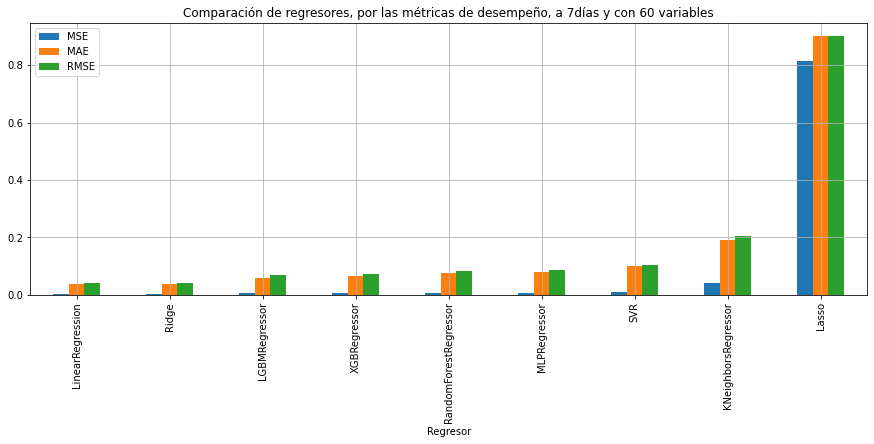

In [107]:
metrics_df.sort_values('MAE')[['Regresor', 'MSE', 'MAE', 'RMSE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores, por las métricas de desempeño, a '+ str(fh) + 'días y con ' + str(features) + ' variables' ,
)

In [108]:
metrics_df.sort_values('MAE').iplot(kind='bar', x='Regresor', y=['MSE', 'MAE', 'RMSE'],
                                    title='Comparación de regresores, por las métricas de desempeño, a '+ str(fh) + 'días y con ' + str(features) + ' variables' ,
                                    yTitle='metros', xTitle='Regresor', dimensions=(950, 350), theme='pearl' )

In [109]:
metrics_df.sort_values('MAE').iplot(kind='bar', x='Regresor', y=['MAE', 'RMSE'],
                                    title='Comparación de regresores, por las métricas de desempeño, a '+ str(fh) + 'días y con ' + str(features) + ' variables' ,
                                    yTitle='metros', xTitle='Regresor', dimensions=(950, 350), theme='pearl' )

In [110]:
metrics_df.sort_values('MAE')[['Regresor', 'MAE', 'RMSE']].style.set_properties(**{'text-align': 'left'}).hide_index()

Regresor,MAE,RMSE
LinearRegression,0.035668,0.039198
Ridge,0.036341,0.039780
LGBMRegressor,0.057050,0.067591
XGBRegressor,0.066337,0.071027
RandomForestRegressor,0.075600,0.081404
MLPRegressor,0.079329,0.085943
SVR,0.100191,0.101859
KNeighborsRegressor,0.190571,0.204787
Lasso,0.902157,0.902313


In [111]:
metrics_df.sort_values('MAE').style.set_properties(**{'text-align': 'left'}).hide_index()

Regresor,MAE,MSE,RMSE,MASE
LinearRegression,0.035668,0.001537,0.039198,0.469424
Ridge,0.036341,0.001582,0.039780,0.478282
LGBMRegressor,0.057050,0.004568,0.067591,0.750831
XGBRegressor,0.066337,0.005045,0.071027,0.873051
RandomForestRegressor,0.075600,0.006627,0.081404,0.994966
MLPRegressor,0.079329,0.007386,0.085943,1.044045
SVR,0.100191,0.010375,0.101859,1.318612
KNeighborsRegressor,0.190571,0.041938,0.204787,2.508097
Lasso,0.902157,0.814169,0.902313,11.873227


## Grid Search

In [112]:
import itertools

In [113]:
# Importo un regresor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

In [114]:
# Lista con los regresores
regresores = [ 
    KNeighborsRegressor()
    ,Lasso()
    ,LGBMRegressor(objective='regression', linear_tree=True)
    ,LinearRegression()
    ,MLPRegressor(max_iter=600, random_state=170162)
    ,RandomForestRegressor(criterion='absolute_error', random_state=170162) 
    ,Ridge()
    ,SVR(gamma='auto', kernel='rbf') 
    ,XGBRegressor()
    ]

In [115]:
# Grilla de parámetros a combinar 
param_grid = { 'fh': [7, 56]
              ,'regresores': regresores
              ,'features': [40, 60] }

In [116]:
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

In [117]:
# Creo una lista para las métricas
error_metrics=[]

In [118]:
# Creo una lista para los gráficos
from sktime.utils.plotting import plot_series
plots=[]

In [119]:
# Número de observaciones del salto
observations = len(SALTO)



Ciclos de Grid Search: 36
Ciclo 1 de 36


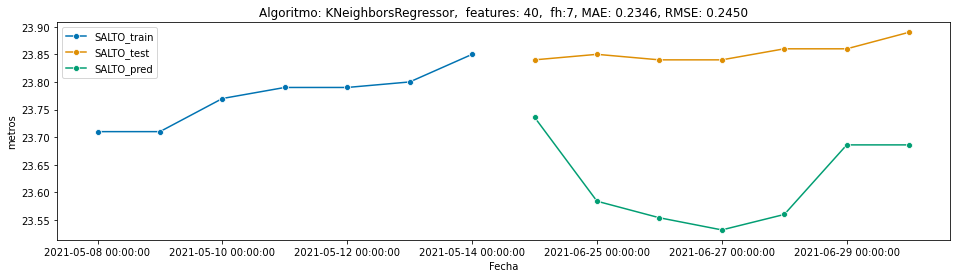

<Figure size 1152x288 with 0 Axes>

Ciclo 2 de 36


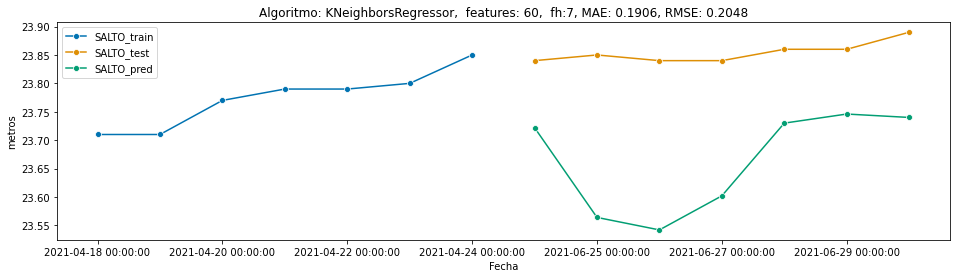

<Figure size 1152x288 with 0 Axes>

Ciclo 3 de 36


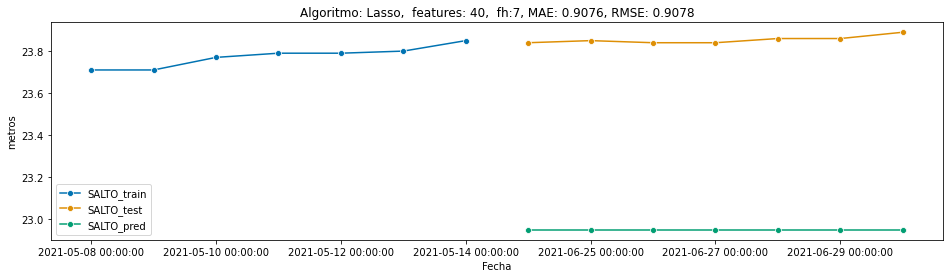

<Figure size 1152x288 with 0 Axes>

Ciclo 4 de 36


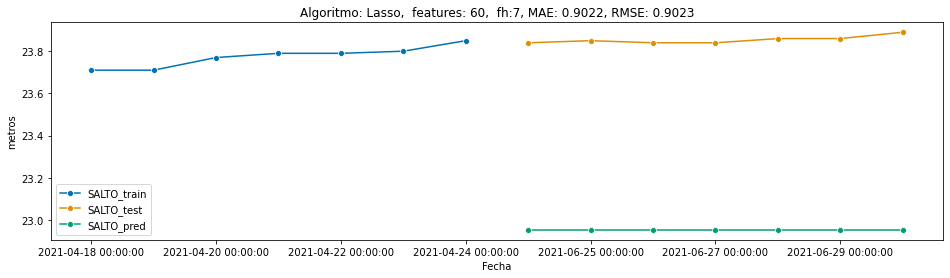

<Figure size 1152x288 with 0 Axes>

Ciclo 5 de 36


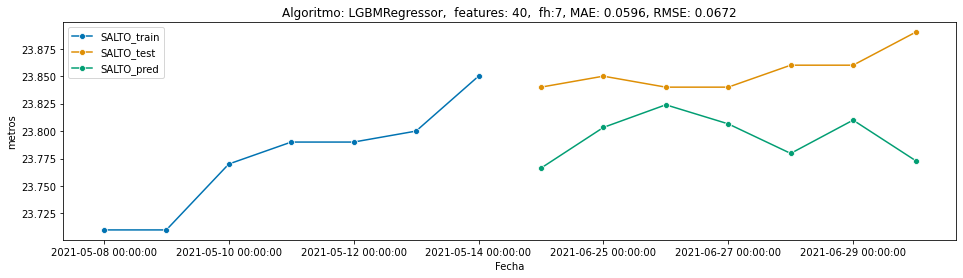

<Figure size 1152x288 with 0 Axes>

Ciclo 6 de 36


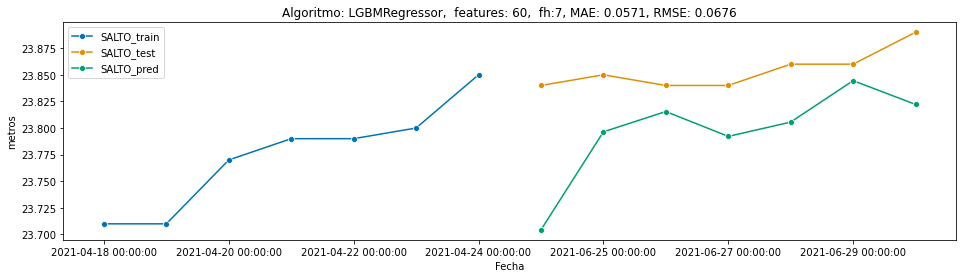

<Figure size 1152x288 with 0 Axes>

Ciclo 7 de 36


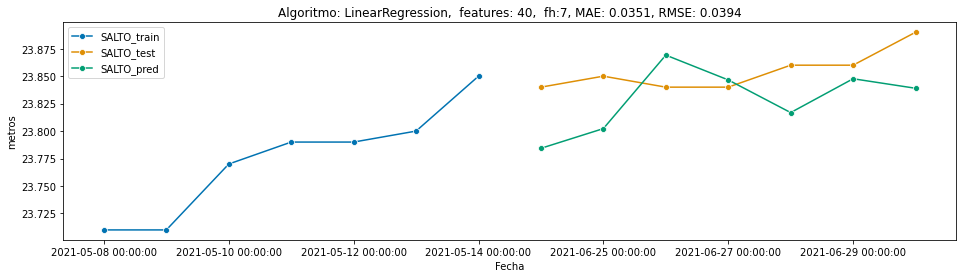

<Figure size 1152x288 with 0 Axes>

Ciclo 8 de 36


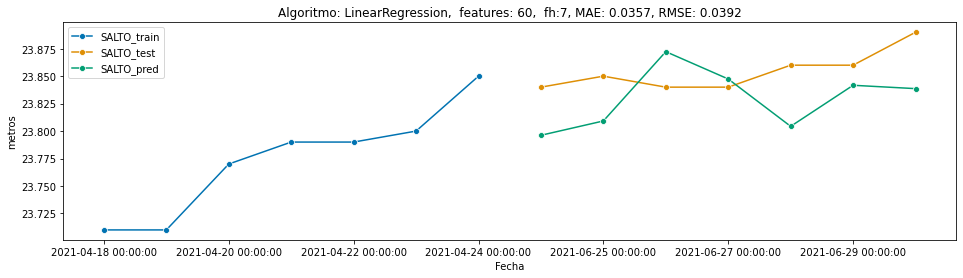

<Figure size 1152x288 with 0 Axes>

Ciclo 9 de 36


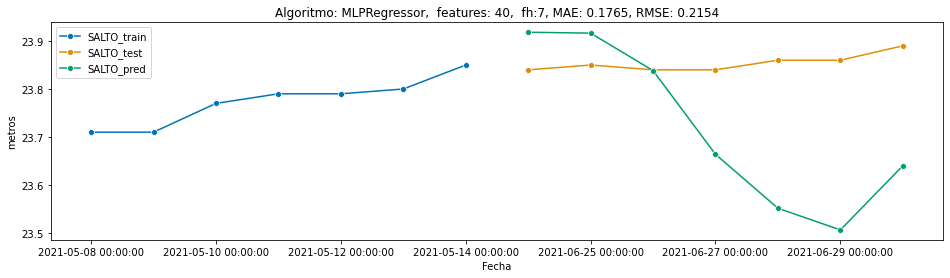

<Figure size 1152x288 with 0 Axes>

Ciclo 10 de 36


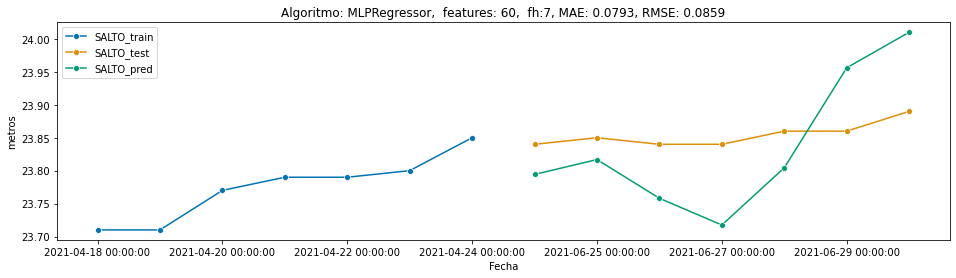

<Figure size 1152x288 with 0 Axes>

Ciclo 11 de 36


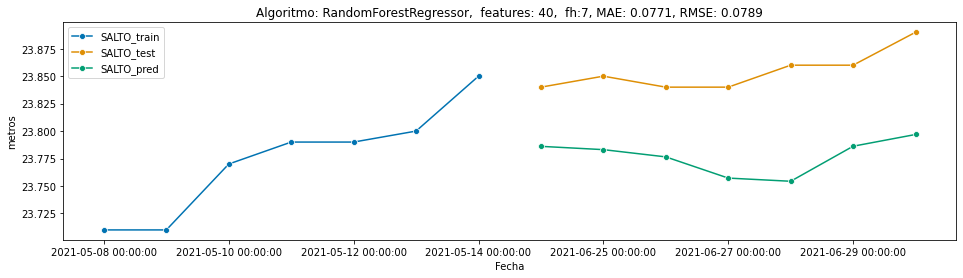

<Figure size 1152x288 with 0 Axes>

Ciclo 12 de 36


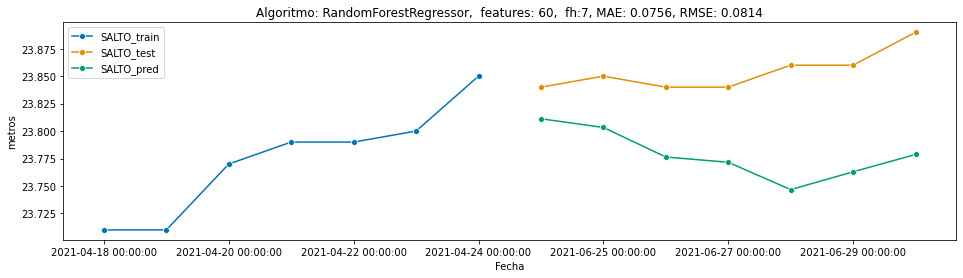

<Figure size 1152x288 with 0 Axes>

Ciclo 13 de 36


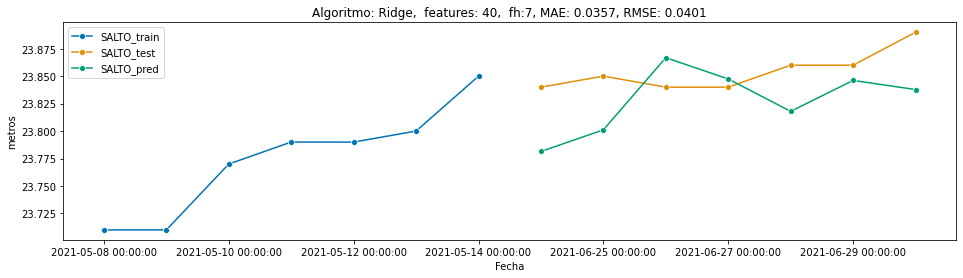

<Figure size 1152x288 with 0 Axes>

Ciclo 14 de 36


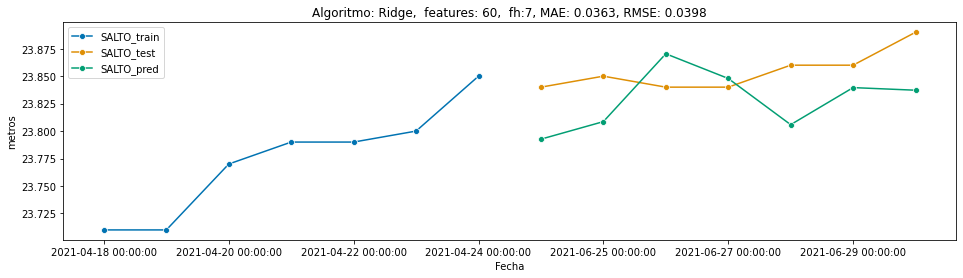

<Figure size 1152x288 with 0 Axes>

Ciclo 15 de 36


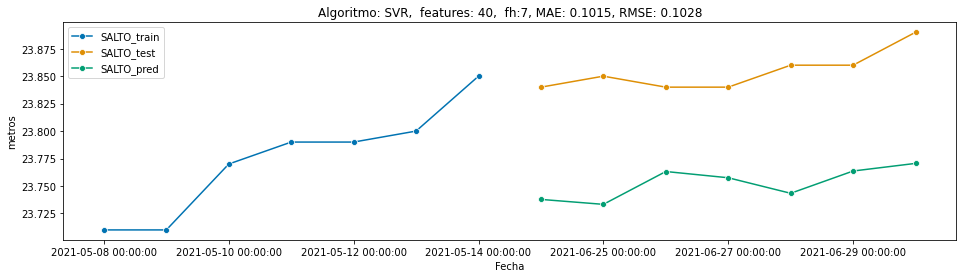

<Figure size 1152x288 with 0 Axes>

Ciclo 16 de 36


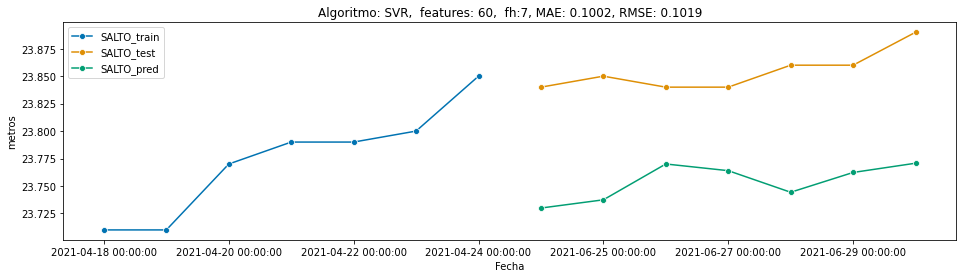

<Figure size 1152x288 with 0 Axes>

Ciclo 17 de 36


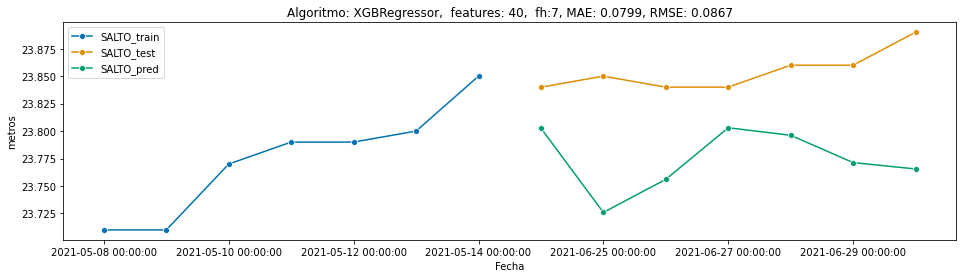

<Figure size 1152x288 with 0 Axes>

Ciclo 18 de 36


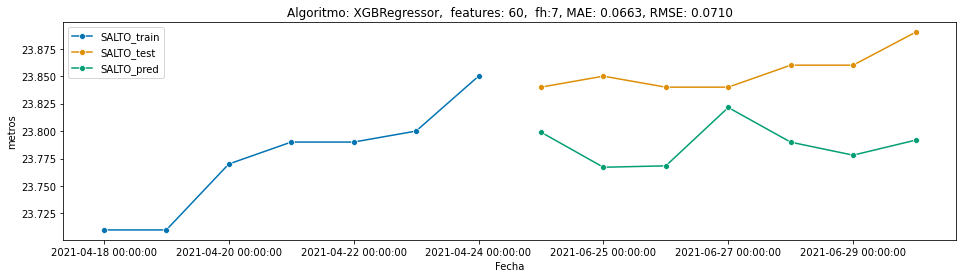

<Figure size 1152x288 with 0 Axes>

Ciclo 19 de 36


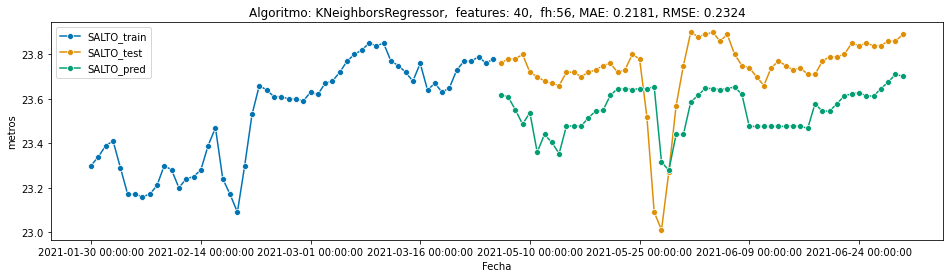

<Figure size 1152x288 with 0 Axes>

Ciclo 20 de 36


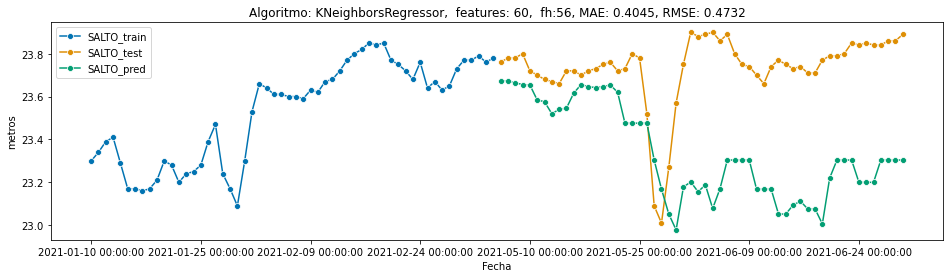

<Figure size 1152x288 with 0 Axes>

Ciclo 21 de 36


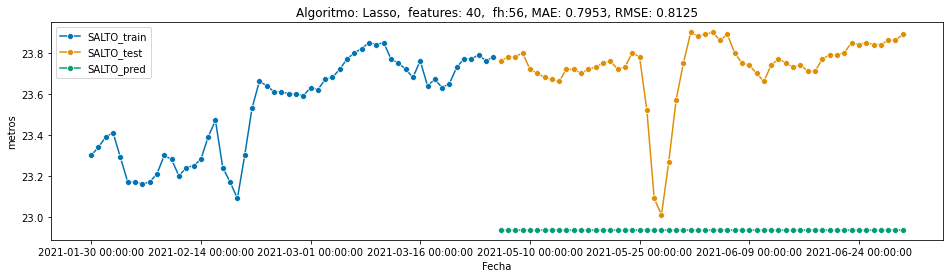

<Figure size 1152x288 with 0 Axes>

Ciclo 22 de 36


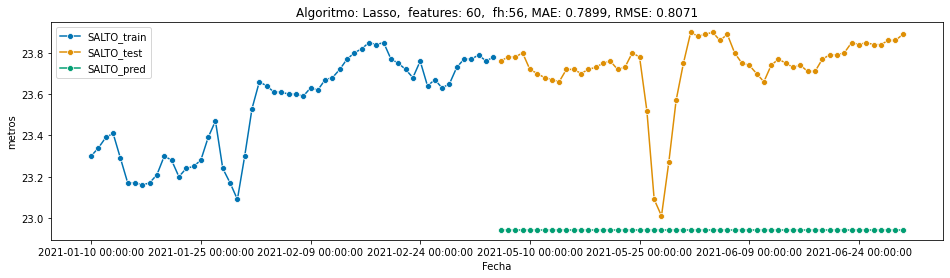

<Figure size 1152x288 with 0 Axes>

Ciclo 23 de 36


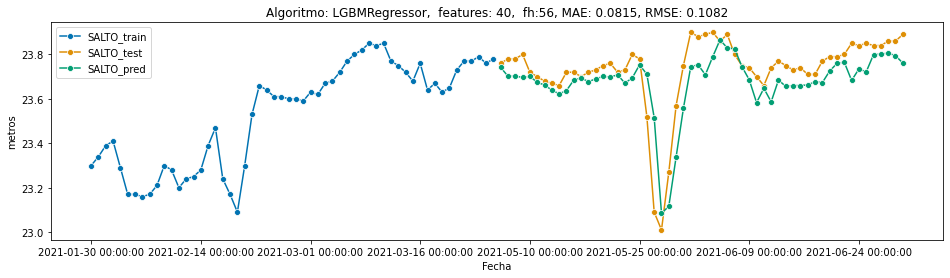

<Figure size 1152x288 with 0 Axes>

Ciclo 24 de 36


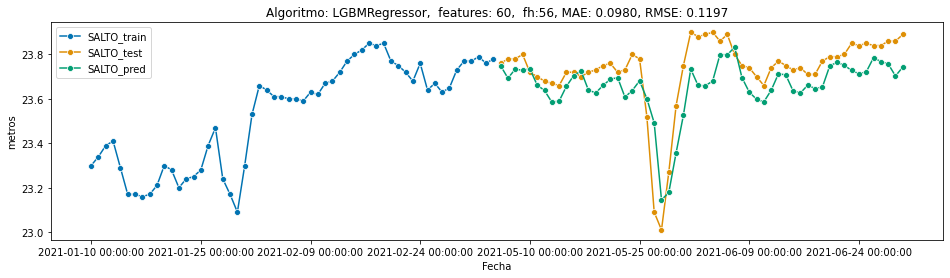

<Figure size 1152x288 with 0 Axes>

Ciclo 25 de 36


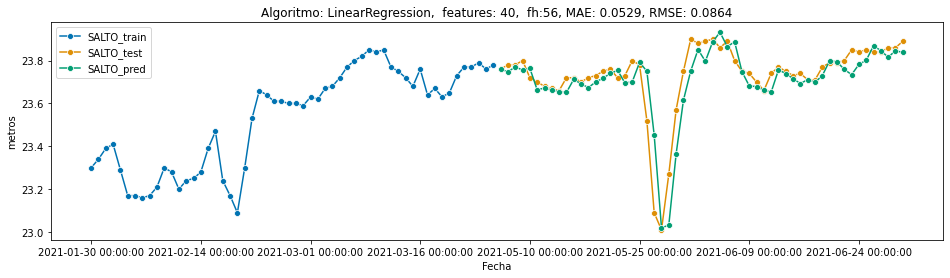

<Figure size 1152x288 with 0 Axes>

Ciclo 26 de 36


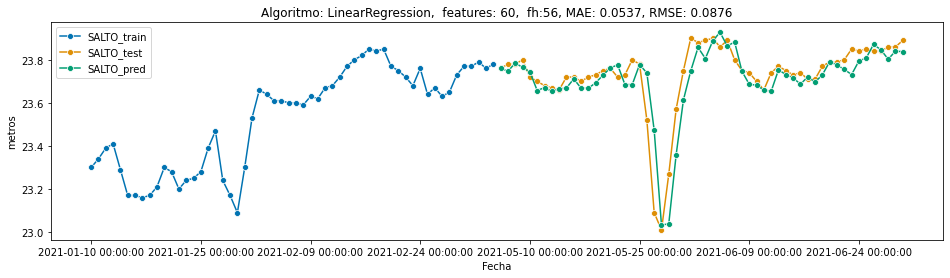

<Figure size 1152x288 with 0 Axes>

Ciclo 27 de 36


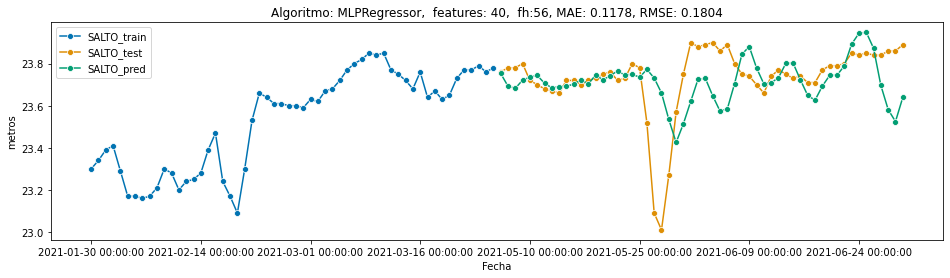

<Figure size 1152x288 with 0 Axes>

Ciclo 28 de 36


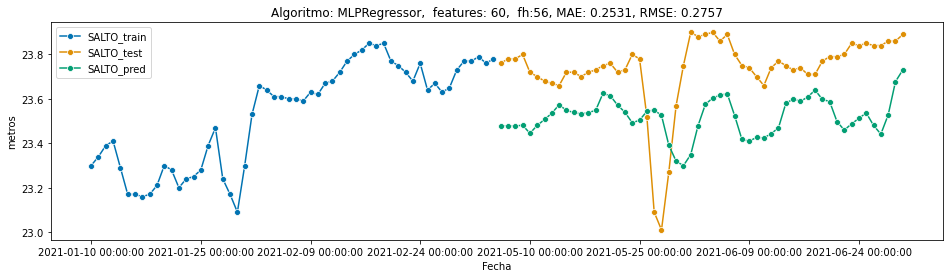

<Figure size 1152x288 with 0 Axes>

Ciclo 29 de 36


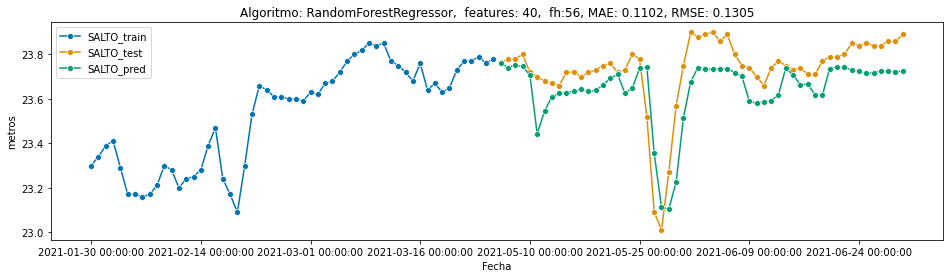

<Figure size 1152x288 with 0 Axes>

Ciclo 30 de 36


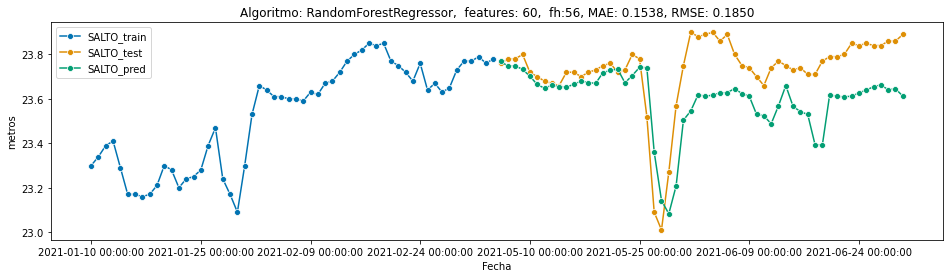

<Figure size 1152x288 with 0 Axes>

Ciclo 31 de 36


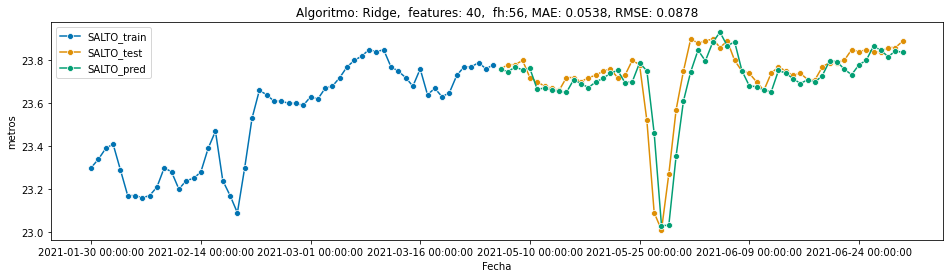

<Figure size 1152x288 with 0 Axes>

Ciclo 32 de 36


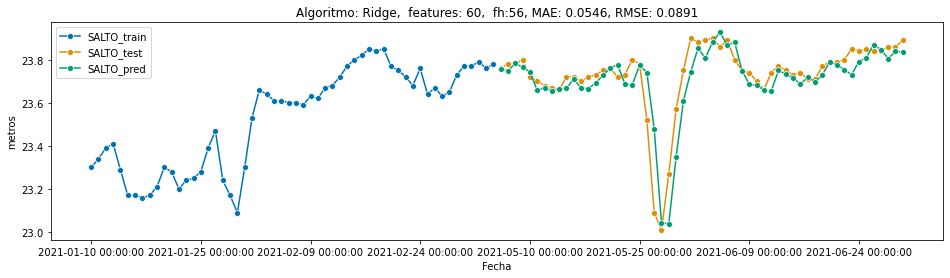

<Figure size 1152x288 with 0 Axes>

Ciclo 33 de 36


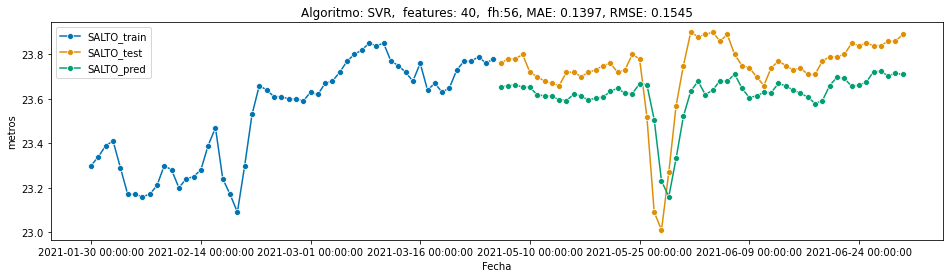

<Figure size 1152x288 with 0 Axes>

Ciclo 34 de 36


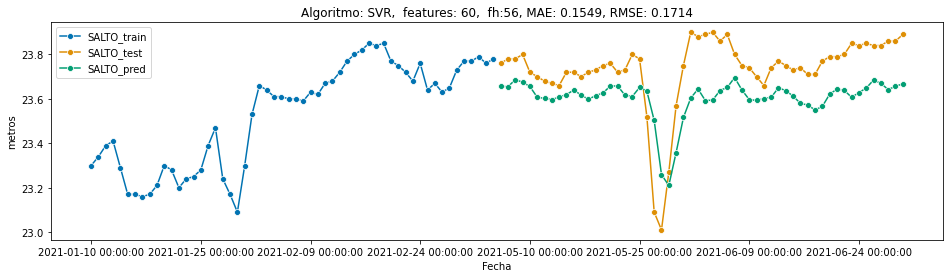

<Figure size 1152x288 with 0 Axes>

Ciclo 35 de 36


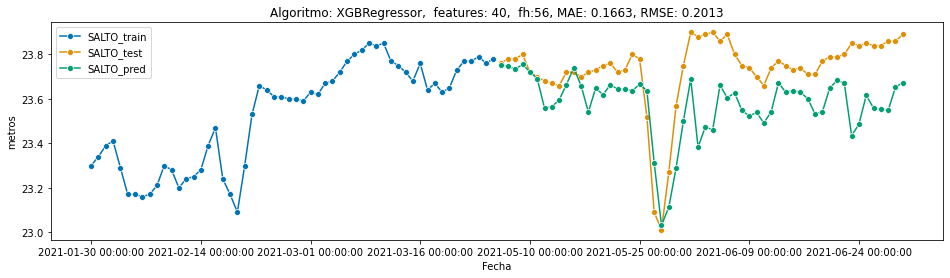

<Figure size 1152x288 with 0 Axes>

Ciclo 36 de 36


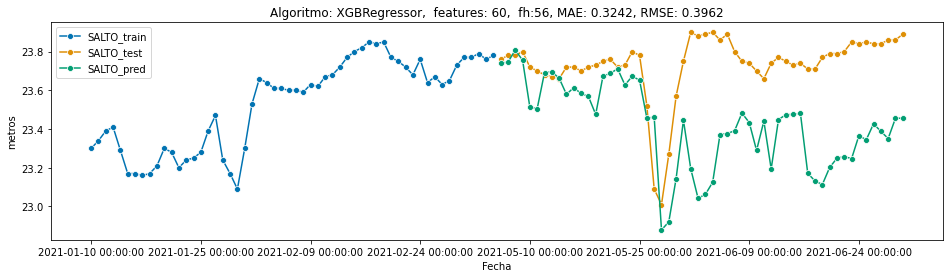

<Figure size 1152x288 with 0 Axes>



Fin Grid Search


In [120]:
# Imprimo el número de ciclos
ciclos = len(all_params)
print('\n\nCiclos de Grid Search:', ciclos)
ciclo = 1

# Itero sobre la lista de parámetros
for params in all_params:

    # Imrimo el número del ciclo actual
    print('Ciclo', ciclo, 'de', ciclos)

    # Número de features a generar (Reduction)
    features = params['features']
    
    # Listas de features y de target
    X = [] # Matriz de features
    y = [] # Vector de targets
    
    # Hago la reducción
    for i in range(0, observations-features):
        X.append(SALTO[i:i+features]) # 'features' valores
        y.append(SALTO[i+features])   # Un target 
        
    # Convierto las listas en arreglos de Numpay
    X = np.array(X)
    y = np.array(y)    
    
    # Train / test split
    fh = params['fh'] # Pasos (días) a predecir
 
    # Features splitting
    X_train = X[:len(X)-fh]
    X_test = X[len(X)-fh:]

    # Target splitting
    y_train = y[:len(X)-fh]
    y_test = y[len(X)-fh:]
    
        
     # Regresor a utilizar
    regresor = params['regresores']
    
    # Entreno el regresor con los conjuntos de train
    regresor.fit(X_train, y_train)
    
    # Predigo con los valores de X_test
    y_pred = regresor.predict(X_test)
    
    # Convierto las y_'s de Numpy a Pandas series
    SALTO_train = pd.Series(y_train)
    SALTO_train.index = SALTO[:len(y_train)].index
    #SALTO_train.index = SALTO_train.index.date
    
    SALTO_test = pd.Series(y_test)
    SALTO_test.index = SALTO[-len(y_test):].index
    #SALTO_test.index = SALTO_test.index.date
    
    SALTO_pred = pd.Series(y_pred)
    SALTO_pred.index = SALTO[-len(y_test):].index
    #SALTO_pred.index = SALTO_pred.index.date
    
    # Calculo metricas
    MAE = mae(y_test, y_pred) 
    MSE = mse(y_test, y_pred)
    RMSE = rmse(y_true=y_test, y_pred=y_pred) 
    MASE = mase(y_true=y_test, y_pred=y_pred, y_train=y_train)

    error_metrics.append( {
                       'regresor': type(regresor).__name__,
                       'features': features,
                       'fh': fh,
                       'mae': MAE, 
                       'mse': MSE,
                       'rmse': RMSE, 
                       'mase': MASE
                      }
                    )

    # Ploteo los resultados
    titulo = 'Algoritmo: ' + type(regresor).__name__  + ',  features: ' + str(features) + ',  fh:'+ str(fh) + ', MAE: ' + f'{MAE:0.4f}' + ', RMSE: ' + f'{RMSE:0.4f}'
#     plots.append(plot_series(SALTO_train[-fh:], SALTO_test, SALTO_pred, 
#                              labels=["SALTO_train", "SALTO_test", "SALTO_pred"], x_label=titulo)) 
    fig, ax = plot_series(SALTO_train[-fh:], SALTO_test, SALTO_pred, 
                              labels=["SALTO_train", "SALTO_test", "SALTO_pred"], x_label='Fecha', y_label='metros')
    plt.figure(figsize=(16, 4))
    ax.set_title(titulo)
    ax.tick_params(axis='x', labelrotation = 0)
    plt.show()

    # Ploteo los resultados con iplot()
    pd.concat([SALTO.iloc[int(-1.5*fh):], SALTO_pred], keys=['SALTO', 'SALTO_pred'], axis=1) \
                          .iplot(mode='lines+markers', size=5.0
                                 ,title='Algoritmo: ' + type(regresor).__name__  + ',  features:' + str(features) + ',  fh:'+ str(fh) + ', MAE: ' + f'{MAE:0.4f}' + ', RMSE: ' + f'{RMSE:0.4f}'
                                 ,yTitle='metros'
                                 ,xTitle='Fecha'
                                 ,dimensions=(950, 300)
                                 )

    # Scatter Plot y_test vs y_pred
    #plt.scatter(y_test, y_pred)
    #plt.title(titulo)
    #plt.xlabel("y_test")
    #plt.ylabel("y_pred")
    #plt.show()
    
    
    # Incremento el contador de ciclos
    ciclo = ciclo+1

print('\n\nFin Grid Search')
    
# Convierto la lista de métricas en un dataframe y lo ordeno por valores
metrics_df = pd.DataFrame.from_dict(error_metrics).sort_values(['fh', 'mae', 'features'])    

In [121]:
metrics_df.style.set_properties(**{'text-align': 'left'}).hide_index()

regresor,features,fh,mae,mse,rmse,mase
LinearRegression,40,7,0.035102,0.001556,0.039448,0.461872
LinearRegression,60,7,0.035668,0.001537,0.039198,0.469424
Ridge,40,7,0.035687,0.001611,0.040133,0.469571
Ridge,60,7,0.036341,0.001582,0.039780,0.478282
LGBMRegressor,60,7,0.057050,0.004568,0.067591,0.750831
LGBMRegressor,40,7,0.059598,0.004516,0.067202,0.784195
XGBRegressor,60,7,0.066337,0.005045,0.071027,0.873051
RandomForestRegressor,60,7,0.075600,0.006627,0.081404,0.994966
RandomForestRegressor,40,7,0.077100,0.006222,0.078881,1.014495
MLPRegressor,60,7,0.079329,0.007386,0.085943,1.044045


In [122]:
metrics_df.loc[metrics_df.fh==7][['regresor', 'features', 'fh', 'mae', 'rmse']].style.set_properties(**{'text-align': 'left'}).hide_index()

regresor,features,fh,mae,rmse
LinearRegression,40,7,0.035102,0.039448
LinearRegression,60,7,0.035668,0.039198
Ridge,40,7,0.035687,0.040133
Ridge,60,7,0.036341,0.039780
LGBMRegressor,60,7,0.057050,0.067591
LGBMRegressor,40,7,0.059598,0.067202
XGBRegressor,60,7,0.066337,0.071027
RandomForestRegressor,60,7,0.075600,0.081404
RandomForestRegressor,40,7,0.077100,0.078881
MLPRegressor,60,7,0.079329,0.085943


In [123]:
print(metrics_df.loc[metrics_df.fh==7][['regresor', 'features', 'fh', 'mae', 'rmse']].to_string(index=False))

             regresor  features  fh      mae     rmse
     LinearRegression        40   7 0.035102 0.039448
     LinearRegression        60   7 0.035668 0.039198
                Ridge        40   7 0.035687 0.040133
                Ridge        60   7 0.036341 0.039780
        LGBMRegressor        60   7 0.057050 0.067591
        LGBMRegressor        40   7 0.059598 0.067202
         XGBRegressor        60   7 0.066337 0.071027
RandomForestRegressor        60   7 0.075600 0.081404
RandomForestRegressor        40   7 0.077100 0.078881
         MLPRegressor        60   7 0.079329 0.085943
         XGBRegressor        40   7 0.079906 0.086716
                  SVR        60   7 0.100191 0.101859
                  SVR        40   7 0.101530 0.102774
         MLPRegressor        40   7 0.176510 0.215397
  KNeighborsRegressor        60   7 0.190571 0.204787
  KNeighborsRegressor        40   7 0.234571 0.244985
                Lasso        60   7 0.902157 0.902313
                Lasso       

In [124]:
metrics_df.loc[metrics_df.fh==7].sort_values('mae')[['regresor', 'features', 'fh', 'mae', 'rmse']]

,regresor,features,fh,mae,rmse
6,LinearRegression,40,7,0.035102,0.039448
7,LinearRegression,60,7,0.035668,0.039198
12,Ridge,40,7,0.035687,0.040133
13,Ridge,60,7,0.036341,0.039780
5,LGBMRegressor,60,7,0.057050,0.067591
4,LGBMRegressor,40,7,0.059598,0.067202
17,XGBRegressor,60,7,0.066337,0.071027
11,RandomForestRegressor,60,7,0.075600,0.081404
10,RandomForestRegressor,40,7,0.077100,0.078881
9,MLPRegressor,60,7,0.079329,0.085943


In [125]:
#metrics_df.loc[metrics_df.fh==7][['regresor', 'features', 'fh', 'mae', 'rmse']].style.pipe(make_pretty)

In [126]:
# Instalar Tabulate
#print(metrics_df.loc[metrics_df.fh==7][['regresor', 'features', 'fh', 'mae', 'rmse']].to_markdown(index=False))

In [127]:
metrics_df.loc[metrics_df.fh==56][['regresor', 'features', 'fh', 'mae', 'rmse']].style.set_properties(**{'text-align': 'left'}).hide_index()

regresor,features,fh,mae,rmse
LinearRegression,40,56,0.052908,0.086374
LinearRegression,60,56,0.053651,0.087601
Ridge,40,56,0.053785,0.087801
Ridge,60,56,0.054611,0.089060
LGBMRegressor,40,56,0.081537,0.108204
LGBMRegressor,60,56,0.098023,0.119689
RandomForestRegressor,40,56,0.110236,0.130499
MLPRegressor,40,56,0.117849,0.180392
SVR,40,56,0.139742,0.154454
RandomForestRegressor,60,56,0.153821,0.184986


In [128]:
error_metrics

[{'regresor': 'KNeighborsRegressor',
  'features': 40,
  'fh': 7,
  'mae': 0.234571428571429,
  'mse': 0.06001771428571446,
  'rmse': 0.24498513074412182,
  'mase': 3.0865305271310923},
 {'regresor': 'KNeighborsRegressor',
  'features': 60,
  'fh': 7,
  'mae': 0.19057142857142903,
  'mse': 0.04193771428571419,
  'rmse': 0.20478699735509134,
  'mase': 2.5080971518434416},
 {'regresor': 'Lasso',
  'features': 40,
  'fh': 7,
  'mae': 0.9076027638412089,
  'mse': 0.8240244095852622,
  'rmse': 0.907757902518762,
  'mase': 11.942390657570684},
 {'regresor': 'Lasso',
  'features': 60,
  'fh': 7,
  'mae': 0.9021571415930342,
  'mse': 0.8141691407803753,
  'rmse': 0.9023132165608433,
  'mase': 11.87322661275332},
 {'regresor': 'LGBMRegressor',
  'features': 40,
  'fh': 7,
  'mae': 0.05959755106420163,
  'mse': 0.00451609746871249,
  'rmse': 0.06720191566252029,
  'mase': 0.7841946558546801},
 {'regresor': 'LGBMRegressor',
  'features': 60,
  'fh': 7,
  'mae': 0.05705001903197931,
  'mse': 0.004

### Cross Validation

In [204]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

#### Pronóstico a 7 días

In [205]:
fh = 7

# Features splitting
X_train = X[:len(X)-fh]
X_test = X[len(X)-fh:]

# Target splitting
y_train = y[:len(X)-fh]
y_test = y[len(X)-fh:]

In [206]:
# Evaluate each model in turn
results = []
names = []

for regresor in regresores:
    print('\n' + type(regresor).__name__)

    tscv = TimeSeriesSplit(n_splits=20)
    cv_results = -cross_val_score(estimator=regresor
                                 ,X=X_train
                                 ,y=y_train
                                 ,cv=tscv
                                 ,scoring='neg_mean_absolute_error'
                                 ,n_jobs=-1
                                 ,verbose=2
                                 ,error_score='raise')
    results.append(cv_results)
    names.append(type(regresor).__name__)
    print('%s: %s: %f %s: %f' % (type(regresor).__name__, 'media', cv_results.mean(), 'std', cv_results.std()))


KNeighborsRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNeighborsRegressor: media: 0.196574 std: 0.063771

Lasso


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Lasso: media: 0.320318 std: 0.136551

LGBMRegressor


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


LGBMRegressor: media: 0.104940 std: 0.033705

LinearRegression
LinearRegression: media: 0.077821 std: 0.013013

MLPRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    7.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MLPRegressor: media: 0.610764 std: 1.679332

RandomForestRegressor


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  2.5min remaining:   37.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestRegressor: media: 0.095016 std: 0.023726

Ridge
Ridge: media: 0.076183 std: 0.013181

SVR


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


SVR: media: 0.105372 std: 0.041937

XGBRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.6s remaining:    0.6s


XGBRegressor: media: 0.114532 std: 0.033269


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished


In [207]:
df_results = pd. DataFrame(np.transpose(results), columns=names)

In [208]:
df_results

,KNeighborsRegressor,Lasso,LGBMRegressor,LinearRegression,MLPRegressor,RandomForestRegressor,Ridge,SVR,XGBRegressor
0,0.234816,0.487670,0.141223,0.082099,7.916967,0.099464,0.063853,0.190532,0.112116
1,0.168581,0.274135,0.074601,0.079397,0.197179,0.076012,0.075896,0.096003,0.124885
2,0.131453,0.278105,0.084992,0.085504,0.146673,0.077309,0.078319,0.082061,0.087761
3,0.308972,0.249646,0.134894,0.078978,0.432150,0.117570,0.078550,0.130769,0.124768
4,0.119499,0.101770,0.061753,0.052846,0.131514,0.055498,0.051946,0.058427,0.062602
5,0.210626,0.263583,0.119854,0.104987,0.391867,0.117185,0.104989,0.121922,0.115853
6,0.143702,0.226092,0.211494,0.089544,0.213230,0.101461,0.087488,0.088697,0.101150
7,0.137117,0.230506,0.077311,0.080549,0.201984,0.075531,0.080025,0.087647,0.087419
8,0.369732,0.645120,0.119834,0.088581,0.400632,0.117921,0.090793,0.239597,0.157010
9,0.233620,0.241201,0.069807,0.057850,0.467097,0.062456,0.057929,0.123406,0.071642


In [209]:
# Calculo medias y std de cada regresor para luego ordenar el orden de impresikón
df_results_medias_stds=[]
for col in df_results.columns:
#    print('%s %s: %f %s: %f' % (col, 'media', df_results[col].mean(), 'std', df_results[col].std()))
    df_results_medias_stds.append(
        {
        'regresor': col
        ,'media': df_results[col].mean()
        ,'std': df_results[col].std()
        }
    )


In [210]:
df_df_results_medias_stds = pd.DataFrame(df_results_medias_stds).sort_values('media')

In [211]:
df_df_results_medias_stds.style.set_properties(**{'text-align': 'left'}).hide_index()

regresor,media,std
Ridge,0.076183,0.013524
LinearRegression,0.077821,0.013351
RandomForestRegressor,0.095016,0.024342
LGBMRegressor,0.104940,0.034581
SVR,0.105372,0.043026
XGBRegressor,0.114532,0.034134
KNeighborsRegressor,0.196574,0.065428
Lasso,0.320318,0.140099
MLPRegressor,0.610764,1.722958


In [212]:
ordered_cols = list(df_df_results_medias_stds['regresor'])
ordered_cols

['Ridge',
 'LinearRegression',
 'RandomForestRegressor',
 'LGBMRegressor',
 'SVR',
 'XGBRegressor',
 'KNeighborsRegressor',
 'Lasso',
 'MLPRegressor']

In [213]:
# Calculo medias y std de cada regresor para luego ordenar el orden de impresikón
df_results_medias_stds=[]
for col in df_results.columns:
    print('%s %s: %f %s: %f' % (col, 'media', df_results[col].mean(), 'std', df_results[col].std()))
#    print(col, 'media', df_results[col].mean(), 'std', df_results[col].std())

    df_results_medias_stds.append(
        {
        'regresor': col
        ,'media': df_results[col].mean()
        ,'std': df_results[col].std()
        }
    )

KNeighborsRegressor media: 0.196574 std: 0.065428
Lasso media: 0.320318 std: 0.140099
LGBMRegressor media: 0.104940 std: 0.034581
LinearRegression media: 0.077821 std: 0.013351
MLPRegressor media: 0.610764 std: 1.722958
RandomForestRegressor media: 0.095016 std: 0.024342
Ridge media: 0.076183 std: 0.013524
SVR media: 0.105372 std: 0.043026
XGBRegressor media: 0.114532 std: 0.034134


In [214]:
df_results.columns

Index(['KNeighborsRegressor', 'Lasso', 'LGBMRegressor', 'LinearRegression',
       'MLPRegressor', 'RandomForestRegressor', 'Ridge', 'SVR',
       'XGBRegressor'],
      dtype='object')

In [215]:
# Ploteo un boxplot para ver la distribución de los valores y atípicos
df_results.iplot(kind='box'
                 ,theme='pearl'
                 ,dimensions=(750, 400)
                 ,keys=ordered_cols[:-1]
                 ,title='MAE (media y dispersión) del pronóstico a ' + str(fh) + ' días, por Cross-Validation (x20)'
                 ,yTitle='metros'
                 ,xTitle='regresor'
                )

In [216]:
# Ploteo un boxplot para ver la distribución de los valores y atípicos
df_results.iplot(kind='box'
                 ,theme='pearl'
                 ,dimensions=(200, 400)
                 ,keys=['MLPRegressor']
                 #,title='MAE (media y dispersión) del pronóstico a ' + str(fh) + ' días, por Cross-Validation (x20)'
                 ,yTitle='MAE MLPRegressor, 7 días, CV (x20), metros'
                 ,xTitle='regresor'
                )

In [217]:
print('fh:', fh, 'días')

fh: 7 días


#### Pronóstico a 56 días

In [218]:
fh = 56

# Features splitting
X_train = X[:len(X)-fh]
X_test = X[len(X)-fh:]

# Target splitting
y_train = y[:len(X)-fh]
y_test = y[len(X)-fh:]

In [ ]:
# Evaluate each model in turn
results = []
names = []

for regresor in regresores:
    print('\n' + type(regresor).__name__)

    tscv = TimeSeriesSplit(n_splits=20)
    cv_results = -cross_val_score(estimator=regresor
                                 ,X=X_train
                                 ,y=y_train
                                 ,cv=tscv
                                 ,scoring='neg_mean_absolute_error'
                                 ,n_jobs=-1
                                 ,verbose=2
                                 ,error_score='raise')
    results.append(cv_results)
    names.append(type(regresor).__name__)
    print('%s: %s: %f %s: %f' % (type(regresor).__name__, 'media', cv_results.mean(), 'std', cv_results.std()))


KNeighborsRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


KNeighborsRegressor: media: 0.190227 std: 0.057560

Lasso
Lasso: media: 0.314947 std: 0.119308

LGBMRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s


LGBMRegressor: media: 0.096995 std: 0.020052

LinearRegression
LinearRegression: media: 0.078111 std: 0.012505

MLPRegressor


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    7.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MLPRegressor: media: 0.612614 std: 1.671688

RandomForestRegressor


In [ ]:
df_results = pd. DataFrame(np.transpose(results), columns=names)

In [ ]:
df_results

In [ ]:
# Calculo medias y std de cada regresor para luego ordenar el orden de impresión
df_results_medias_stds=[]
for col in df_results.columns:
    print('%s %s: %f %s: %f' % (col, 'media', df_results[col].mean(), 'std', df_results[col].std()))
    df_results_medias_stds.append(
        {
        'regresor': col
        ,'media': df_results[col].mean()
        ,'std': df_results[col].std()
        }
    )
    
df_df_results_medias_stds = pd.DataFrame(df_results_medias_stds).sort_values('media')

ordered_cols = list(df_df_results_medias_stds['regresor'])

In [ ]:
df_df_results_medias_stds.style.set_properties(**{'text-align': 'left'}).hide_index()

In [228]:
# Ploteo un boxplot para ver la distribución de los valores y atípicos
df_results.iplot(kind='box'
                 ,theme='pearl'
                 ,dimensions=(750, 400)
                 ,keys=ordered_cols[:-1]
#                  ,title='MAE (media y dispersión) del pronóstico a ' + str(fh) + ' días, por Cross-Validation (x20)'
                 ,yTitle='MAE MLPRegressor, 56 días, CV (x20), metros'
                 ,xTitle='regresor'
                )

In [ ]:
# Ploteo un boxplot para ver la distribución de los valores y atípicos
df_results.iplot(kind='box'
                 ,theme='pearl'
                 ,dimensions=(200, 400)
                 ,keys=['MLPRegressor']
                 ,title='MAE (media y dispersión) del pronóstico a ' + str(fh) + ' días, por Cross-Validation (x20)'
                 ,yTitle='metros'
                 ,xTitle='regresor'
                )

In [ ]:
print('fh:', fh, 'días')

# ¡Fin del Notebook!